# Libraries

In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from numpy.linalg import inv
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import scipy.sparse
import sklearn.datasets as ds

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Import

          0         1         2         3
0  0.310717 -0.555809 -0.525699 -0.099447
1  0.246847  0.727829 -0.092874 -0.384187
2 -0.520913 -0.251172  0.552788  0.475450
3  1.638685  1.141203 -1.641457 -1.587285
4 -1.762712 -1.182744  1.778145  1.695722

   0
0  1
1  0
2  1
3  0
4  1

Time --- Minutes --- 0.0


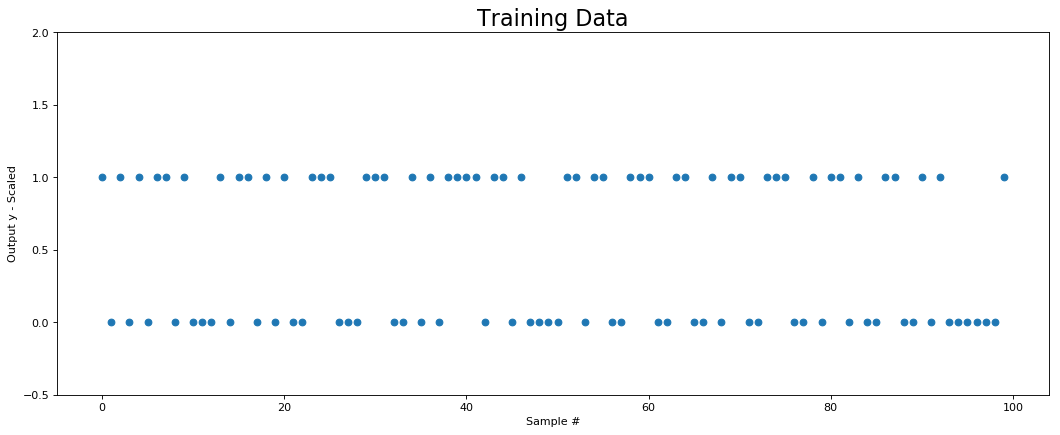

In [17]:
start_time = time.time()

#####################################################################################################

x,y = ds.make_classification(n_features=4, n_informative=2,
                             n_classes=2, n_clusters_per_class=1,
                             random_state=3216)

x = pd.DataFrame(StandardScaler().fit_transform(x))
y = pd.DataFrame(y)
xb = np.hstack((x, np.ones((x.shape[0],1))))

print(x.head()); print()
print(y.head()); print()

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Training Data', fontsize=20)
plt.xlabel('Sample #')
plt.ylabel('Output y - Scaled')
plt.ylim(min(y)-0.5, max(y)+2)
plt.plot(y, 'o');

#####################################################################################################

print("Time --- Minutes ---", np.round((time.time() - start_time) / 60, decimals=2))

# Logistic Regression

Final Error  -2.04461489824 ----- With 10 Iterations



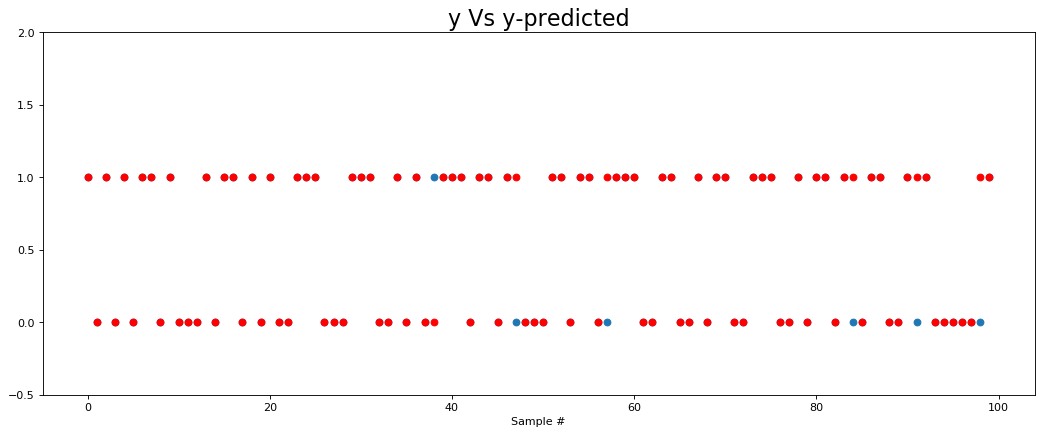

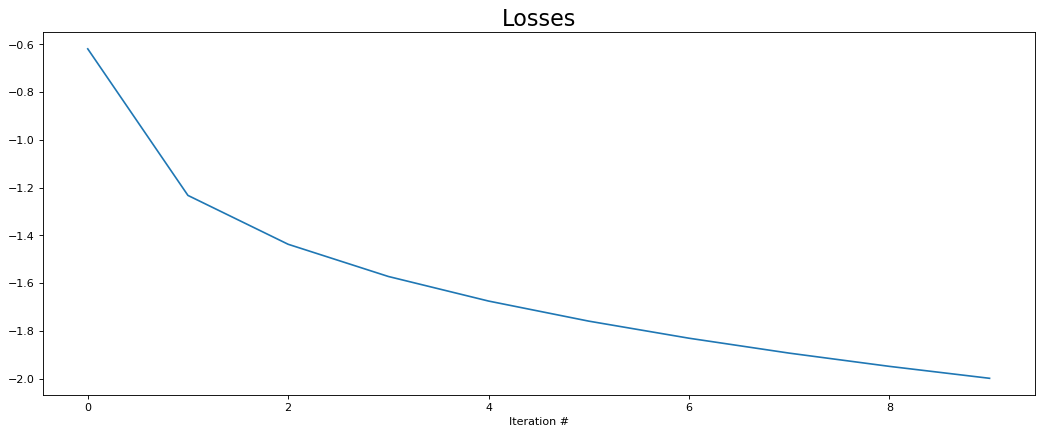

Time --- Minutes --- 0.01


In [18]:
start_time = time.time()

#####################################################################################################

def cost_function(y,y_pred):
    return -((np.dot(y.T,np.log(y_pred)) +
             np.dot((1 - y.T),(1 - np.log(y_pred)))) / y.shape[0])[0][0]

def sigmoid(z):
    return np.divide(1., (1 + np.exp(-z)))

# Gradient Descent Learning
thetas=1*(np.random.rand(xb.shape[1],1)-0.5)
tolerance = 0.01
niter = 10
eta = 0.01
i = 1
losses = []
while(i <= niter):
    y_pred = sigmoid(np.dot(xb, thetas))
    cost = cost_function(y, y_pred)
    if(np.abs(cost) <= tolerance):
        break
    thetas = thetas + eta * np.dot(xb.T, (y-y_pred))
    losses.append(cost)
    i = i + 1
y_pred = sigmoid(np.dot(xb, thetas))

#####################################################################################################

# Final Results
print('Final Error ', cost_function(y, y_pred), '----- With', i-1, 'Iterations'); print()

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('y Vs y-predicted', fontsize=20)
plt.xlabel('Sample #')
plt.plot(y, 'o')
plt.plot(np.round(y_pred), 'o', color='red')
plt.ylim(min(y)-0.5, max(y)+2)
plt.show();

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Losses', fontsize=20)
plt.xlabel('Iteration #')
plt.plot(losses)
plt.show();

#####################################################################################################

print("Time --- Minutes ---", np.round((time.time() - start_time) / 60, decimals=2))

# Data Import

          0         1         2         3
0 -1.151430 -1.154482 -0.104067 -0.917702
1 -1.160138 -1.098570 -1.245025 -0.155984
2 -0.809836 -0.873518  1.012185 -1.377167
3 -1.208736 -1.163397 -0.965440 -0.386163
4 -0.353569 -0.439519  1.467509 -1.292678

   0
0  2
1  0
2  2
3  0
4  2

Time --- Minutes --- 0.0


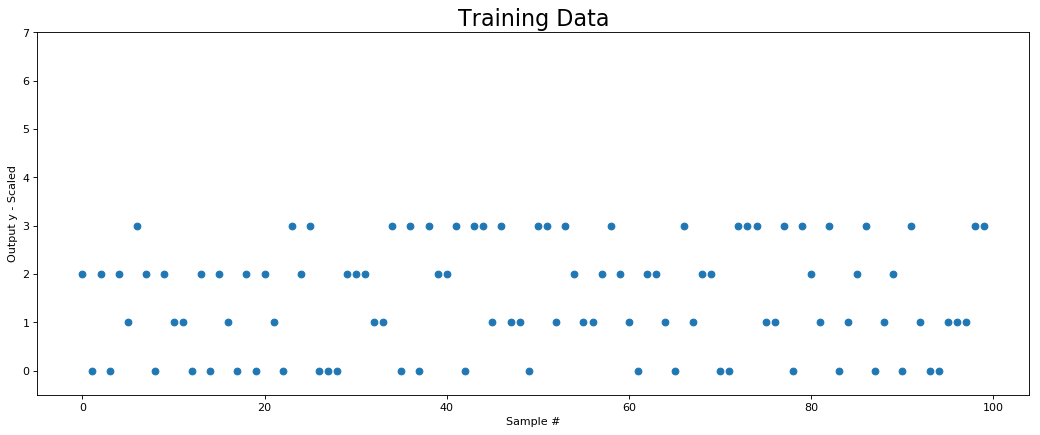

In [19]:
start_time = time.time()

#####################################################################################################

x,y = ds.make_classification(n_features=4, n_informative=2,
                             n_classes=4, n_clusters_per_class=1,
                             random_state=3216)

x = pd.DataFrame(StandardScaler().fit_transform(x))
y = pd.DataFrame(y)
xb = np.hstack((x, np.ones((x.shape[0],1))))

print(x.head()); print()
print(y.head()); print()
y = y.as_matrix()

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Training Data', fontsize=20)
plt.xlabel('Sample #')
plt.ylabel('Output y - Scaled')
plt.ylim(min(y)-0.5, max(y)+4)
plt.plot(y, 'o');

#####################################################################################################

print("Time --- Minutes ---", np.round((time.time() - start_time) / 60, decimals=2))

# Softmax Regression

Final Error  0.414034765235 ----- With 10 Iterations



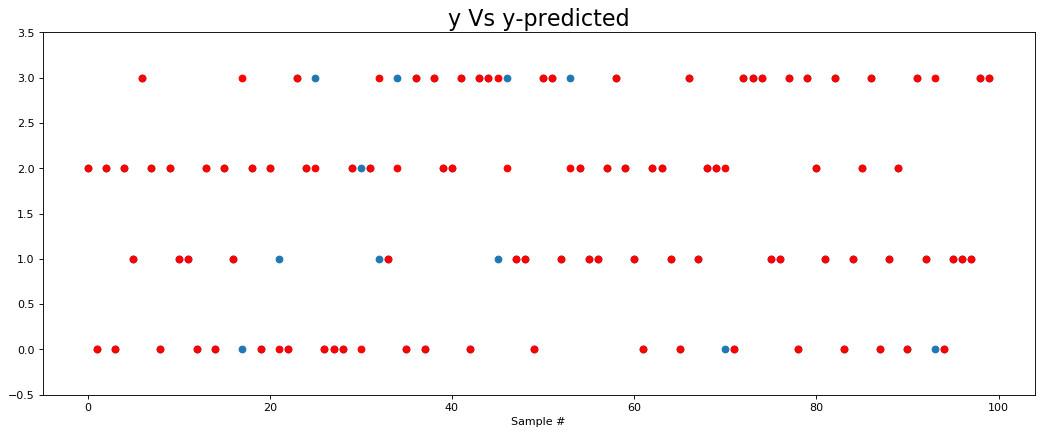

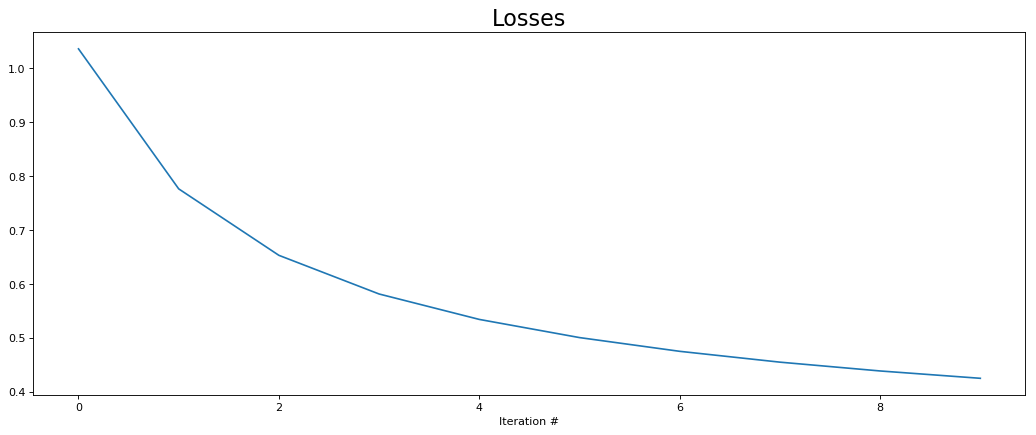

Time --- Minutes --- 0.01


In [20]:
start_time = time.time()

#####################################################################################################

def cost_function(y, y_pred, thetas):
    return -(np.sum(y * np.log(y_pred)) + (0.1/2)*np.sum(thetas*thetas)) / y.shape[0]

def indicator_matrix(y):
    data = np.ones(y.shape[0])
    rows = np.array(range(y.shape[0]))
    y = y.reshape(-1)
    y_indicator = scipy.sparse.csr_matrix((data, (rows, y)))
    y_indicator = np.array(y_indicator.todense())
    return y_indicator

def softmax(x):
    sm = np.exp(x)
    sm = sm / sm.sum(axis=1)[:,None]
    return sm

# Gradient Descent Learning
thetas= 1 * (np.random.rand(xb.shape[1], len(np.unique(y)) )-0.5)
tolerance = 0.01
niter = 10
eta = 0.01
i = 1

y_indicator = indicator_matrix(y)

losses = []
while(i <= niter):
    y_pred = softmax(np.dot(xb, thetas))
    cost = cost_function(y_indicator, y_pred, thetas)
    if(np.abs(cost) <= tolerance):
        break
    thetas = thetas + eta * np.dot(xb.T, (y_indicator - y_pred))
    losses.append(cost)
    i = i + 1
y_pred = softmax(np.dot(xb, thetas))
y_pred_arg = np.argmax(softmax(np.dot(xb, thetas)),axis=1).reshape(-1,1)

#####################################################################################################

# Final Results
print('Final Error ', cost_function(y_indicator, y_pred, thetas), '----- With', i-1, 'Iterations'); print()

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('y Vs y-predicted', fontsize=20)
plt.xlabel('Sample #')
plt.plot(y, 'o')
plt.plot(y_pred_arg, 'o', color='red')
plt.ylim(min(y)-0.5, max(y)+0.5)
plt.show();

plt.figure(figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title('Losses', fontsize=20)
plt.xlabel('Iteration #')
plt.plot(losses)
plt.show();

#####################################################################################################

print("Time --- Minutes ---", np.round((time.time() - start_time) / 60, decimals=2))